In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [26]:
image_path="../output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

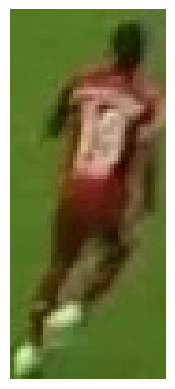

In [27]:
plt.imshow(image)
plt.axis('off')
plt.show()

# Take the Top half of the Image

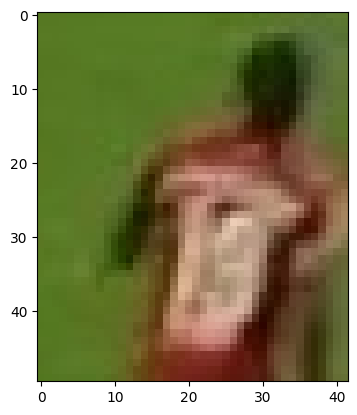

In [28]:
top_half_image=image[0:int(image.shape[0]/2),:]

plt.imshow(top_half_image)
plt.show()

# Clustering the Image into 2 Colors (background, Tshirt Color)

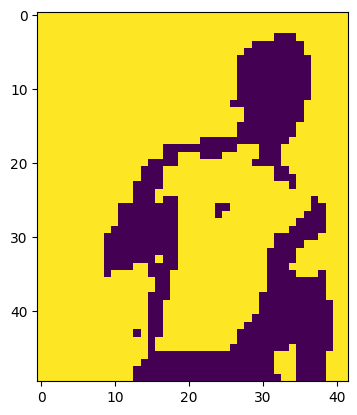

In [29]:
image_2d=top_half_image.reshape(-1,3)

# perform KMeans clustering with 2 clusters

kmeans=KMeans(n_clusters=2,random_state=0).fit(image_2d)

# get the cluster labels

cluster_labels=kmeans.labels_

# reshape the labels into the original image

clustered_image=cluster_labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the clustered image

plt.imshow(clustered_image)
plt.show()

In [32]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster= max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

1


In [34]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [35]:
kmeans.cluster_centers_[player_cluster]

array([75.65660377, 51.6490566 , 19.9       ])